<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# 1. csv / json 읽기
import json
import pandas as pd
path = "/content/drive/MyDrive/train.csv"
data = pd.read_csv(path)
datatest = data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# 1.전체 인원 수, 생존자 수, 사망자 수는 몇 명인가?
s_data = data["Survived"]
vc = s_data.value_counts()
print(f"사망자 수:{vc[0]} 생존자 수 : {vc[1]}")

사망자 수:549 생존자 수 : 342


In [3]:
# !sudo apt-get install -y fonts-nanum # 한글폰트설치(나눔설치)
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

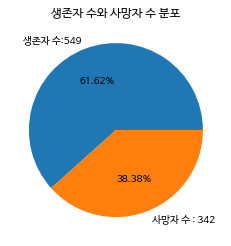

In [6]:
# 2.생존자와 사망자를 Pie그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오. (파이 이미지를 제출하시오.)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #한글 안깨지게.
plt.pie(vc,labels=[f"생존자 수:{vc[0]}",f" 사망자 수 : {vc[1]}"],autopct="%.2f%%")
plt.title('생존자 수와 사망자 수 분포')
plt.savefig("no2.png")
plt.show()


In [ ]:
# 3.결측 데이터가 있는 컬럼을 조사하시오.(컬럼 별로 결측 데이터 개수)
for col in data.columns:
  print("===",col)
  cins = data[col].isnull()
  print(cins.value_counts())

In [9]:
# 4.Pclass의 종류 별로 승객 분포를 파이 그래프로 나타내시오.
s_data = data["Pclass"]
vc1 = s_data.value_counts()
print(f"1등급 : {vc1[1]} 2등급 : {vc1[2]} 3등급 : {vc1[3]}")

1등급 : 216 2등급 : 184 3등급 : 491


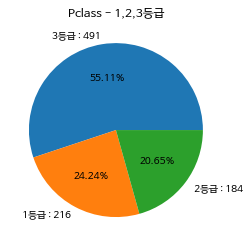

In [10]:
plt.pie(vc1,labels=[f"3등급 : {vc1[3]}",f" 1등급 : {vc1[1]}", f" 2등급 : {vc1[2]}"],autopct="%.2f%%")
plt.title('Pclass - 1,2,3등급')
plt.show()

In [13]:
# 5.Pclass의 종류 별로 생존자 수와 사망자 수를 막대그래프로 나타내시오.(종류 별로 하나의 막대에 생존자 수와 사망자 수를 표시하시오.)
import numpy as np
p_data = data['Pclass']
s_data = data["Survived"]
pvc = p_data.value_counts().sort_index()
p_alive_arr = np.zeros(len(pvc))
p_dead_arr = np.zeros(len(pvc))
for i in range(len(data)):
  ci = p_data[i] - 1
  # 죽었으면
  if s_data[i] == 0:
    p_dead_arr[ci] += 1
  else:
    p_alive_arr[ci] += 1
print(p_alive_arr, p_dead_arr)

[136.  87. 119.] [ 80.  97. 372.]


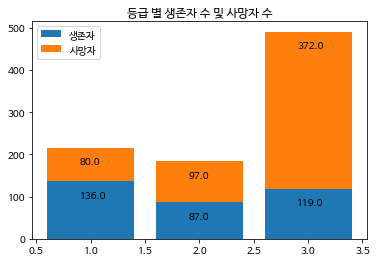

In [54]:
plt.bar(pvc.index,p_alive_arr,label="생존자")
plt.bar(pvc.index,p_dead_arr,bottom=p_alive_arr,label="사망자")
for i in range(len(pvc.index)):
  plt.annotate(str(p_alive_arr[i]),(i+0.9,p_alive_arr[i]-40))
  plt.annotate(str(p_dead_arr[i]),(i+0.9,p_alive_arr[i]+p_dead_arr[i]-40))
plt.title("등급 별 생존자 수 및 사망자 수")
plt.legend()
plt.show()

In [62]:
n_data = data["Name"]
n_data

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

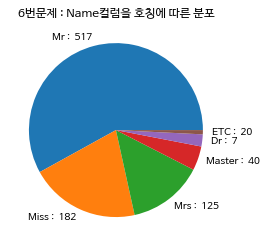

In [116]:
# 6.Name 컬럼에 호칭을 Mr, Mrs, Miss, Master, Dr, ETC(나머지)로 나누어 분포를 파이 그래프로 나타내시오.
n_data = data["Name"]
dataset = data
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
title_mapping = {"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Dr" : 4,
                 "Rev":5,"Col":5,"Major":5,"Mlle":5,"Countess":5,"Ms":5,"Lady":5,
                 "Jonkheer":5,"Don":5,"Dona":5,"Mme":5,"Capt":5,"Sir":5}

dataset['Title'] = dataset['Title'].map(title_mapping)
# dataset['Title']
nc = dataset['Title'].value_counts()
# print(nc)
# print(f"Mr : {nc[0]}",f"Miss : {nc[2]}",f"Mrs : {nc[1]}",f"Master : {nc[3]}",f"ETC : {nc[5]}",f"Dr : {nc[4]}")
plt.pie(nc,labels=[f"Mr :  {nc[0]}",f"Miss :  {nc[2]}",f"Mrs :  {nc[1]}",f"Master :  {nc[3]}",
                   f"Dr :  {nc[4]}",f"ETC :  {nc[5]}"])
plt.title("6번문제 : Name컬럼을 호칭에 따른 분포")
plt.show()

In [97]:
# 7. 호칭에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
s_data = data["Survived"]
nvc = nc.value_counts()
# print(nc)
nc1 = nc.sort_index()
print(nc1)
n_alive_arr = np.zeros(len(nvc))
n_dead_arr = np.zeros(len(nvc))
for i in range(len(data)):
  ni = dataset['Title'][i] - 1
  #뒤지면
  if s_data[i] == 0:
    n_dead_arr[ni] += 1
  else:
    n_alive_arr[ni] += 1
print(n_alive_arr, n_dead_arr)

0    517
1    125
2    182
3     40
4      7
5     20
Name: Title, dtype: int64
[ 99. 127.  23.   3.   9.  81.] [ 26.  55.  17.   4.  11. 436.]


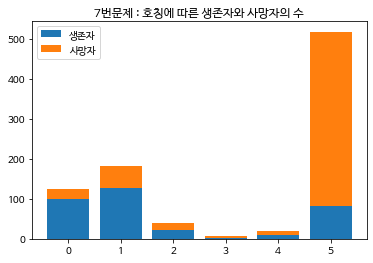

In [102]:
plt.bar(nc1.index,n_alive_arr,label="생존자")
plt.bar(nc1.index,n_dead_arr,label="사망자",bottom=n_alive_arr)
plt.title("7번문제 : 호칭에 따른 생존자와 사망자의 수")
plt.legend()
plt.show()

In [ ]:

plt.bar(pvc.index,p_alive_arr,label="생존자")
plt.bar(pvc.index,p_dead_arr,bottom=p_alive_arr,label="사망자")
for i in range(len(pvc.index)):
  plt.annotate(str(p_alive_arr[i]),(i+0.9,p_alive_arr[i]-40))
  plt.annotate(str(p_dead_arr[i]),(i+0.9,p_alive_arr[i]+p_dead_arr[i]-40))
plt.title("등급 별 생존자 수 및 사망자 수")
plt.legend()
plt.show()

In [ ]:
# 8.성별에 따른 승객 분포를 파이 그래프로 나타내시오.
sex_data = data["Sex"]
sex_count = sex_data.value_counts()
#print(f"male :{sex_count[0]}명 / female : {sex_count[1]}명")
plt.pie(sex_count,labels=[f"male : {sex_count[0]}",f" female : {sex_count[1]}"],autopct="%.2f%%")
plt.title("성별에 따른 승객 분포")
plt.show()

In [55]:
# 9. 성별에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
s_data = data["Survived"]
sex_data = data["Sex"]
svc = sex_data.value_counts().sort_index()
#print(svc) #female 314 // male 577
s_alive_arr_f = np.zeros(len(svc))
s_alive_arr_m = np.zeros(len(svc))
s_dead_arr_f = np.zeros(len(svc))
s_dead_arr_m = np.zeros(len(svc))
# print(s_dead_arr)
for i in range(len(data)):
  si = sex_data[i] 
  # print(si) # male, female, female, male .... 891개
  #뒤지면
  if s_data[i] == 0:
    if si == "female":
      s_dead_arr_f[0] += 1
    else:
      s_dead_arr_m[1] += 1
  #살면
  else:
    if si == "male":
      s_alive_arr_f[0] += 1
    else:
      s_alive_arr_m[1] +=1
    
print(s_alive_arr_f,s_alive_arr_m,s_dead_arr_f,s_dead_arr_m)

[109.   0.] [  0. 233.] [81.  0.] [  0. 468.]


In [44]:
# print(svc.index)

Index(['female', 'male'], dtype='object')


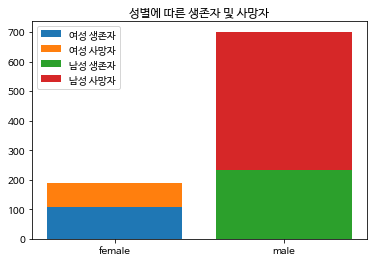

In [56]:
plt.bar(svc.index,s_alive_arr_f, label="여성 생존자")
plt.bar(svc.index,s_dead_arr_f, label="여성 사망자",bottom=s_alive_arr_f)
plt.bar(svc.index,s_alive_arr_m, label="남성 생존자")
plt.bar(svc.index,s_dead_arr_m, label="남성 사망자",bottom=s_alive_arr_m)
# plt.bar(svc.index,s_dead_arr_m, label="남자 사망자")
# plt.bar(svc.index,s_dead_arr_f, label="여자 사망자")

plt.title("성별에 따른 생존자 및 사망자")
plt.legend()
plt.show()

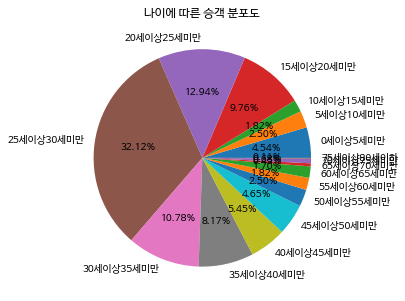

In [146]:
# 10.나이를 5살 범위로(0~5, 5~10,...) 나누어 승객 분포를 파이 그래프로 나타내시오.(결측값은 평균 나이로 처리하시오.)
# 평균값 구하기(결측치에 채우기 위해서)
datatest['Age'].mean()
datatest['Age'] = datatest["Age"].fillna(datatest['Age'].mean()) # 결측치 평균값으로 채우기
age_arr = np.zeros(16)
plt.figure(figsize=(10, 5))
for i in datatest['Age'].values:
  if 0 < i < 5:
    age_arr[0] += 1
  if 5 <= i < 10:
    age_arr[1] += 1
  if 10 <= i < 15:
    age_arr[2] += 1
  if 15 <= i < 20:
    age_arr[3] += 1
  if 20 <= i < 25:
    age_arr[4] += 1
  if 25 <= i < 30:
    age_arr[5] += 1
  if 30 <= i < 35:
    age_arr[6] += 1
  if 35 <= i < 40:
    age_arr[7] += 1
  if 40 <= i < 45:
    age_arr[8] += 1
  if 45 <= i < 50:
    age_arr[9] += 1
  if 50 < i < 55:
    age_arr[10] += 1
  if 55 <= i < 60:
    age_arr[11] += 1
  if 60 <= i < 65:
    age_arr[12] += 1
  if 65 <= i < 70:
    age_arr[13] += 1
  if 70 <= i < 75:
    age_arr[14] += 1
  if 75 <= i <= 80:
    age_arr[15] += 1
plt.pie(age_arr,labels=[f"0세이상5세미만",f"5세이상10세미만",f"10세이상15세미만",
                   f"15세이상20세미만",f"20세이상25세미만",f"25세이상30세미만",
                   f"30세이상35세미만",f"35세이상40세미만",f"40세이상45세미만",
                   f"45세이상50세미만",f"50세이상55세미만",f"55세이상60세미만",
                   f"60세이상65세미만",f"65세이상70세미만",f"70세이상75세미만",
                   f"75세이상80세이하"],autopct="%.2f%%")
plt.title("나이에 따른 승객 분포도")
plt.show()


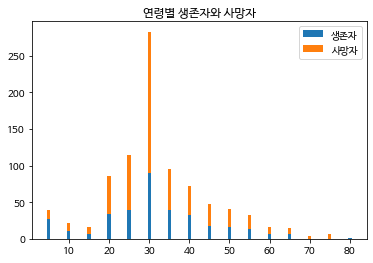

In [155]:
#11번 나이(10번 문제에서 구분한 범위)에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
x = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
age_alive_arr = np.zeros(len(x))
age_dead_arr = np.zeros(len(x))
# age_alive_arr 
for i in range(len(data)):
  ai = data['Age'][i]
  if s_data[i] == 0:
    if 0<=ai<5:
      age_dead_arr[0] +=1
    if 5<=ai<10:
      age_dead_arr[1] +=1
    if 10<=ai<15:
      age_dead_arr[2] +=1
    if 15<=ai<20:
      age_dead_arr[3] +=1
    if 20<=ai<25:
      age_dead_arr[4] +=1
    if 25<=ai<30:
      age_dead_arr[5] +=1
    if 30<=ai<35:
      age_dead_arr[6] +=1
    if 35<=ai<40:
      age_dead_arr[7] +=1
    if 40<=ai<45:
      age_dead_arr[8] +=1
    if 45<=ai<50:
      age_dead_arr[9] +=1
    if 50<=ai<55:
      age_dead_arr[10] +=1
    if 55<=ai<60:
      age_dead_arr[11] +=1
    if 60<=ai<65:
      age_dead_arr[12] +=1
    if 65<=ai<70:
      age_dead_arr[13] +=1
    if 70<=ai<75:
      age_dead_arr[14] +=1
    if 75<=ai<=80:
      age_dead_arr[15] +=1
    
  else:
    if 0<=ai<5:
      age_alive_arr[0] +=1
    if 5<=ai<10:
      age_alive_arr[1] +=1
    if 10<=ai<15:
      age_alive_arr[2] +=1
    if 15<=ai<20:
      age_alive_arr[3] +=1
    if 20<=ai<25:
      age_alive_arr[4] +=1
    if 25<=ai<30:
      age_alive_arr[5] +=1
    if 30<=ai<35:
      age_alive_arr[6] +=1
    if 35<=ai<40:
      age_alive_arr[7] +=1
    if 40<=ai<45:
      age_alive_arr[8] +=1
    if 45<=ai<50:
      age_alive_arr[9] +=1
    if 50<=ai<55:
      age_alive_arr[10] +=1
    if 55<=ai<60:
      age_alive_arr[11] +=1
    if 60<=ai<65:
      age_alive_arr[12] +=1
    if 65<=ai<70:
      age_alive_arr[13] +=1
    if 70<=ai<75:
      age_alive_arr[14] +=1
    if 75<=ai<=80:
      age_alive_arr[15] +=1

# print(age_alive_arr)
# print(age_dead_arr)
plt.bar(x,age_alive_arr, label="생존자")
plt.bar(x,age_dead_arr, label="사망자",bottom=age_alive_arr)
plt.title("연령별 생존자와 사망자")
plt.legend()
plt.show()

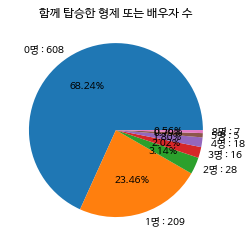

In [165]:
# 12번 SibSp 값에 따라 승객 분포를 파이 그래프로 나타내시오.
sib_data = data["SibSp"]
sb = sib_data.value_counts()
# sb
# print(f"0명 : {sb[0]} 1명 : {sb[1]} 2명 : {sb[2]} 3명 : {sb[3]} 4명 : {sb[4]} 5명 : {sb[5]} 8명 : {sb[8]}")

plt.pie(sb,labels=[f"0명 : {sb[0]}",f"1명 : {sb[1]}",f"2명 : {sb[2]}",f"3명 : {sb[3]}",
                   f"4명 : {sb[4]}",f"5명 : {sb[5]}",f"8명 : {sb[8]}",],autopct="%.2f%%")
plt.title('함께 탑승한 형제 또는 배우자 수')
plt.show()

In [178]:
# 13번 SibSp 값에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
sib_data = data["SibSp"]
s_data = data["Survived"]
sivc = sib_data.value_counts().sort_index()
si_alive_arr = np.zeros(len(sivc))
si_dead_arr = np.zeros(len(sivc))
for i in range(len(data)):
  sib = sib_data[i]
  # 죽었으면
  if s_data[i] == 0:
    if sib == 0:
      si_dead_arr[0] +=1
    if sib == 1:
      si_dead_arr[1] +=1
    if sib == 2:
      si_dead_arr[2] +=1
    if sib == 3:
      si_dead_arr[3] +=1
    if sib == 4:
      si_dead_arr[4] +=1
    if sib == 5:
      si_dead_arr[5] +=1
    if sib == 8:
      si_dead_arr[6] +=1
  else:
    if sib == 0:
      si_alive_arr[0] +=1
    if sib == 1:
      si_alive_arr[1] +=1
    if sib == 2:
      si_alive_arr[2] +=1
    if sib == 3:
      si_alive_arr[3] +=1
    if sib == 4:
      si_alive_arr[4] +=1
    if sib == 5:
      si_alive_arr[5] +=1
    if sib == 8:
      si_alive_arr[6] +=1
print(si_alive_arr, si_dead_arr)

[210. 112.  13.   4.   3.   0.   0.] [398.  97.  15.  12.  15.   5.   7.]


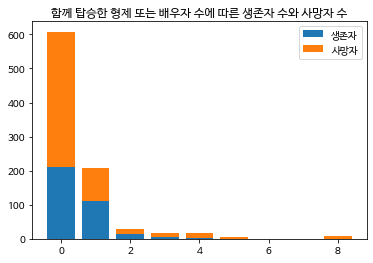

In [180]:
plt.bar(sivc.index,si_alive_arr,label="생존자")
plt.bar(sivc.index,si_dead_arr,bottom=si_alive_arr,label="사망자")
plt.title("함께 탑승한 형제 또는 배우자 수에 따른 생존자 수와 사망자 수")
plt.legend()
plt.show()

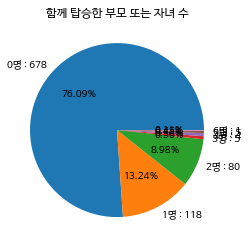

In [186]:
# 14번 Parch 값에 따라 승객 분포를 파이 그래프로 나타내시오.
ph_data = data["Parch"]
ph = ph_data.value_counts()
# ph
# print(f"0명 : {ph[0]} 1명 : {ph[1]} 2명 : {ph[2]} 3명 : {ph[3]} 4명 : {ph[4]} 5명 : {ph[5]} 6명 : {ph[6]}")

plt.pie(ph,labels=[f"0명 : {ph[0]}",f"1명 : {ph[1]}",f"2명 : {ph[2]}",f"3명 : {ph[3]}",
                   f"4명 : {ph[4]}",f"5명 : {ph[5]}",f"6명 : {ph[6]}",],autopct="%.2f%%")
plt.title('함께 탑승한 부모 또는 자녀 수')
plt.show()

In [187]:
# 15번 Parch 값에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
ph_data = data["Parch"]
s_data = data["Survived"]
phvc = ph_data.value_counts().sort_index()
ph_alive_arr = np.zeros(len(phvc))
ph_dead_arr = np.zeros(len(phvc))
for i in range(len(data)):
  phb = ph_data[i]
  # 죽었으면
  if s_data[i] == 0:
    if phb == 0:
      ph_dead_arr[0] +=1
    if phb == 1:
      ph_dead_arr[1] +=1
    if phb == 2:
      ph_dead_arr[2] +=1
    if phb == 3:
      ph_dead_arr[3] +=1
    if phb == 4:
      ph_dead_arr[4] +=1
    if phb == 5:
      ph_dead_arr[5] +=1
    if phb == 6:
      ph_dead_arr[6] +=1
  else:
    if phb == 0:
      ph_alive_arr[0] +=1
    if phb == 1:
      ph_alive_arr[1] +=1
    if phb == 2:
      ph_alive_arr[2] +=1
    if phb == 3:
      ph_alive_arr[3] +=1
    if phb == 4:
      ph_alive_arr[4] +=1
    if phb == 5:
      ph_alive_arr[5] +=1
    if phb == 6:
      ph_alive_arr[6] +=1
print(ph_alive_arr, ph_dead_arr)

[233.  65.  40.   3.   0.   1.   0.] [445.  53.  40.   2.   4.   4.   1.]


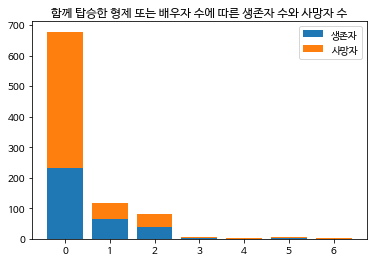

In [189]:
plt.bar(phvc.index,ph_alive_arr,label="생존자")
plt.bar(phvc.index,ph_dead_arr,bottom=ph_alive_arr,label="사망자")
plt.title("함께 탑승한 형제 또는 배우자 수에 따른 생존자 수와 사망자 수")
plt.legend()
plt.show()

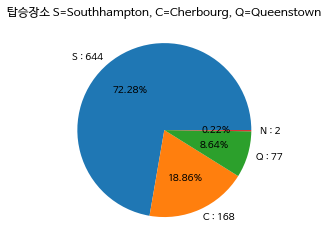

In [204]:
# 16번 승선한 항구(Embarked)에 따른 승객 분포를 파이 그래프로 나타내시오.(결측 값은 'N'으로 처리)
datatest['Embarked'] = datatest["Embarked"].fillna('N') # 결측치 'N''으로 채우기
# print(datatest['Embarked']) #결측치 N으로 변경한것 확인
em_data = datatest["Embarked"]
em = em_data.value_counts()
# em # s: 644, c:168, q:77, n:2
# print(f"S : {em[0]} C : {em[1]} Q : {em[2]} N : {em[3]}")

plt.pie(em,labels=[f"S : {em[0]}",f"C : {em[1]}",f"Q : {em[2]}",f"N : {em[3]}"],autopct="%.2f%%")
plt.title('탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown')
plt.show()

In [212]:
# 17번 승선한 항구(Embarked)에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)
em_data = datatest["Embarked"]
s_data = data["Survived"]
emvc = em_data.value_counts()
em_alive_arr = np.zeros(len(emvc))
em_dead_arr = np.zeros(len(emvc))
for i in range(len(data)):
  emb = em_data[i]
  # 죽었으면
  if s_data[i] == 0:
    if emb == 'S':
      em_dead_arr[0] +=1
    if emb == 'C':
      em_dead_arr[1] +=1
    if emb == 'Q':
      em_dead_arr[2] +=1
    if emb == 'N':
      em_dead_arr[3] +=1
  else:
    if emb == 'S':
      em_alive_arr[0] +=1
    if emb == 'C':
      em_alive_arr[1] +=1
    if emb == 'Q':
      em_alive_arr[2] +=1
    if emb == 'N':
      em_alive_arr[3] +=1
print(em_alive_arr, em_dead_arr)

[217.  93.  30.   2.] [427.  75.  47.   0.]


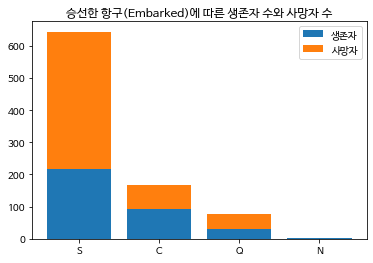

In [214]:
plt.bar(emvc.index,em_alive_arr,label="생존자")
plt.bar(emvc.index,em_dead_arr,bottom=em_alive_arr,label="사망자")
plt.title("승선한 항구(Embarked)에 따른 생존자 수와 사망자 수")
plt.legend()
plt.show()

In [ ]:
# 18번 Age 컬럼의 값을 표준 스케일로 변환하시오. 
#(표준 스케일로 변환하면 평균은 0, 표준편차는 1로 바뀜, 결측치는 평균 값으로 처리)
from sklearn.preprocessing import StandardScaler

# 결측치 제거
age = data["Age"].fillna(data["Age"].mean())

# 2차원 배열로 변환
array = age.values.reshape(-1,1)

# 객체 생성
scaler = StandardScaler()   

# 훈련데이터의 분포 저장
scaler.fit(array)

# 훈련 데이터 스케일링
scaler_scaled = scaler.transform(array)
scaler_scaled